# Importing Libraries

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [25]:
store = pd.read_csv("store.csv")
# train = pd.read_csv("train(2).csv")
# test = pd.read_csv("test(1).csv")

In [3]:
store.head(3)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


In [4]:
train.head(3)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31/07/2015,5263,555,1,1,0,1
1,2,5,31/07/2015,6064,625,1,1,0,1
2,3,5,31/07/2015,8314,821,1,1,0,1


# EDA

### Store

##### <p style="font-size: 20px">Checking Missing Values</p>

In [5]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [6]:
null_counts = store.isnull().sum()
print(null_counts)

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


<p style="font-size: 16px">There are missing values present in <code>CompetitionDistance</code>, <code>CompetitionOpenSinceMonth</code>, <code>CompetitionOpenSinceWeek</code>, <code>Promo2SinceWeek</code>, <code>Promo2SinceYear</code> and <code>PromoInterval</code></p>

In [7]:
store.shape[0] - (store[store.Promo2 == 0].Promo2).shape[0]

571

<p style="font-size: 16px">The data which is missing in <code>Promo2SinceWeek</code>, <code>Promo2SinceYear</code> and <code>PromoInterval</code> columns are because the stores did not had any <code>Promo2</code> campaign ongoing.</p>

##### <p style="font-size: 20px">Dealing with Missing Values</p>

In [8]:
store.loc[store.CompetitionDistance.isnull(), "CompetitionDistance"] = store.CompetitionDistance.mean()

In [9]:
print(f"Promo2SinceWeek unique value: {store.Promo2SinceWeek.unique()}")
print(f"Promo2SinceYear unique value: {store.Promo2SinceYear.unique()}")

Promo2SinceWeek unique value: [nan 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.]
Promo2SinceYear unique value: [  nan 2010. 2011. 2012. 2009. 2014. 2015. 2013.]


In [10]:
store.loc[store.Promo2SinceWeek.isnull(), "Promo2SinceWeek"] = -1
store.loc[store.Promo2SinceYear.isnull(), "Promo2SinceYear"] = -1
store.loc[store.PromoInterval.isnull(), "PromoInterval"] = -1
store.loc[store.CompetitionOpenSinceMonth.isnull(), "CompetitionOpenSinceMonth"] = -1
store.loc[store.CompetitionOpenSinceYear.isnull(), "CompetitionOpenSinceYear"] = -1

In [11]:
null_counts = store.isnull().sum()
print(null_counts)

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64


##### <p style="font-size: 20px">Visualising Data and Finding Insights</p>

In [12]:
print(f"Average Competition Distance: {store.CompetitionDistance.mean():.2f} meters")

Average Competition Distance: 5404.90 meters


#### BADER: We can not use mean for competition Distance, check visualisations below.

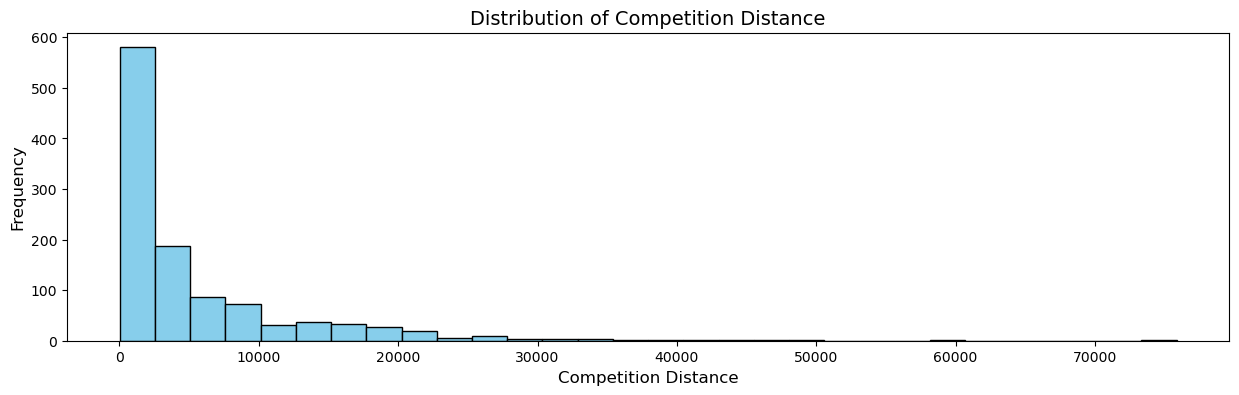

In [31]:
plt.figure(figsize=(15, 4))

# Plot histogram for the 'CompetitionDistance' column
plt.hist(store['CompetitionDistance'], bins=30, color='skyblue', edgecolor='black')

# Add title and labels
plt.title("Distribution of Competition Distance", fontsize=14)
plt.xlabel("Competition Distance", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Display the plot
plt.show()


Skewness -> NEED TO USE MODE OR MEDIAN!

#### We can notice below, there are 3 records missing:
#### Two of them have StoreType == Assortment, 
#### One is not.
#### Therefore, I try to limit records to StoreType == Assortment to check the competitionDistnace distribution, if it is not skewed we may use the mean for these 2 records! same logic for the one that is not.

In [27]:
nullvalues = store['CompetitionDistance'].isnull()
rowsNull = store[nullvalues]
print(rowsNull)

     Store StoreType Assortment  CompetitionDistance  \
290    291         d          a                  NaN   
621    622         a          c                  NaN   
878    879         d          a                  NaN   

     CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
290                        NaN                       NaN       0   
621                        NaN                       NaN       0   
878                        NaN                       NaN       1   

     Promo2SinceWeek  Promo2SinceYear    PromoInterval  
290              NaN              NaN              NaN  
621              NaN              NaN              NaN  
878              5.0           2013.0  Feb,May,Aug,Nov  


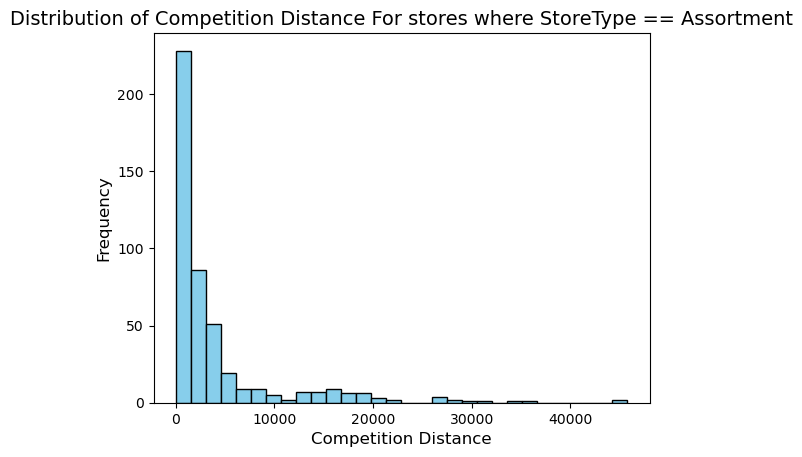

In [43]:
filterType = store[store['StoreType'] == store['Assortment']]
plt.hist(filterType['CompetitionDistance'], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Competition Distance For stores where StoreType == Assortment", fontsize=14)
plt.xlabel("Competition Distance", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

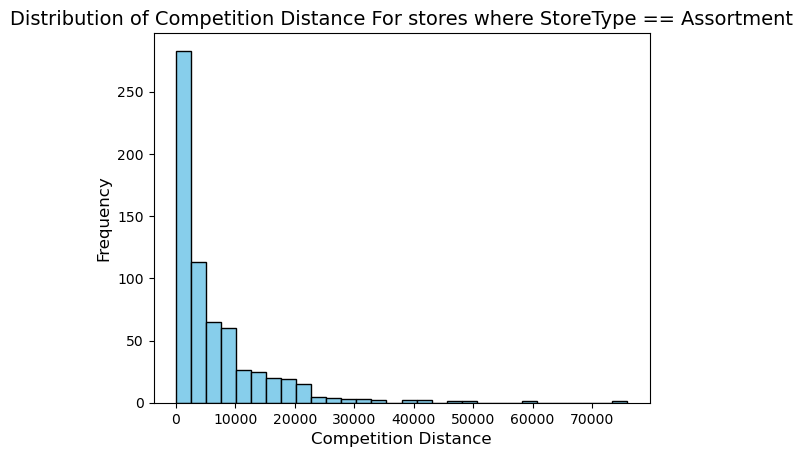

In [45]:
filterNotType = store[store['StoreType'] != store['Assortment']]
plt.hist(filterNotType['CompetitionDistance'], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Competition Distance For stores where StoreType == Assortment", fontsize=14)
plt.xlabel("Competition Distance", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

#### CONCLUSION: USE MEDIAN OR MODE!

<p style="font-size: 16px">Promo2 vs CompetitionDistance</p>

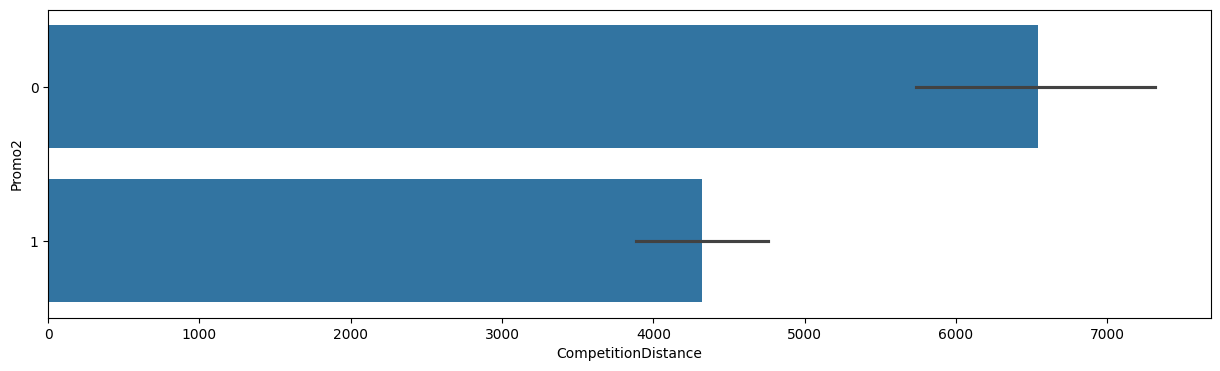

In [13]:
plt.figure(figsize=(15,4))
sns.barplot(store, x="CompetitionDistance", y="Promo2", orient='h')
plt.show()

<p style="font-size: 16px">Assortment vs CompetitionDistance</p>

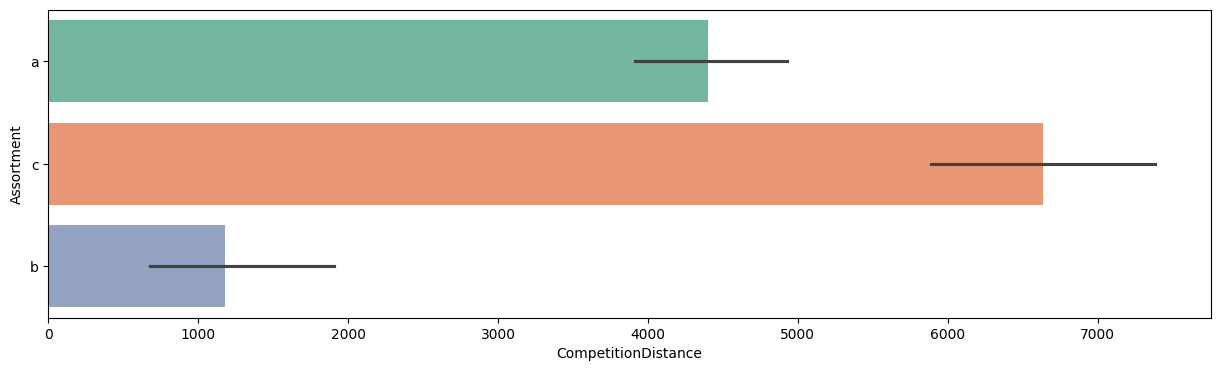

In [14]:
plt.figure(figsize=(15,4))
sns.barplot(store, x="CompetitionDistance", y="Assortment", orient='y', hue="Assortment", palette="Set2")
plt.show()

<p style="font-size: 16px">The total number of stores that started participating in Promo2 by year</p>

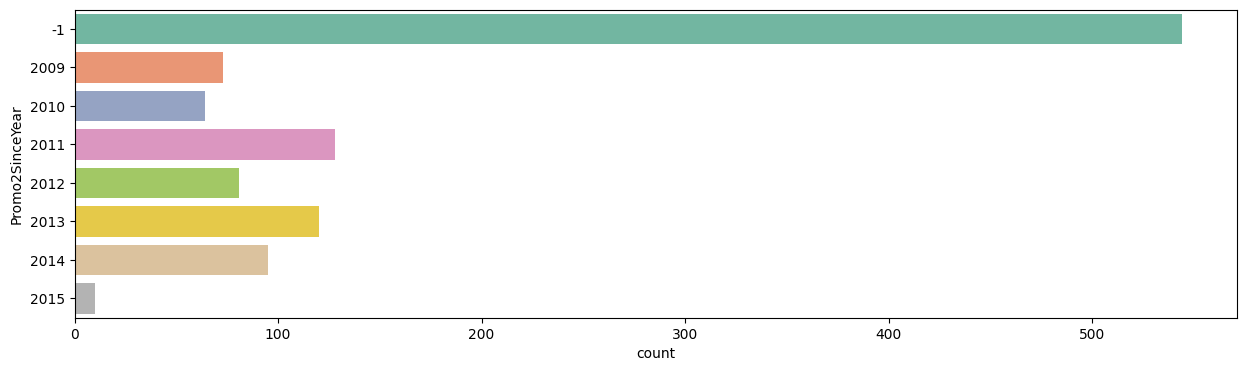

In [15]:
df = store.copy()
df["Promo2SinceYear"] = df.Promo2SinceYear.convert_dtypes()
plt.figure(figsize=(15,4))
sns.countplot(df, y="Promo2SinceYear", hue="Promo2SinceYear", palette="Set2", legend=False)
plt.show()

### Train

##### <p style="font-size: 20px">Checking Missing Values</p>

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [17]:
null_counts = store.isnull().sum()
print(null_counts)

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64


##### <p style="font-size: 20px">Average sales depending on day of week</p>

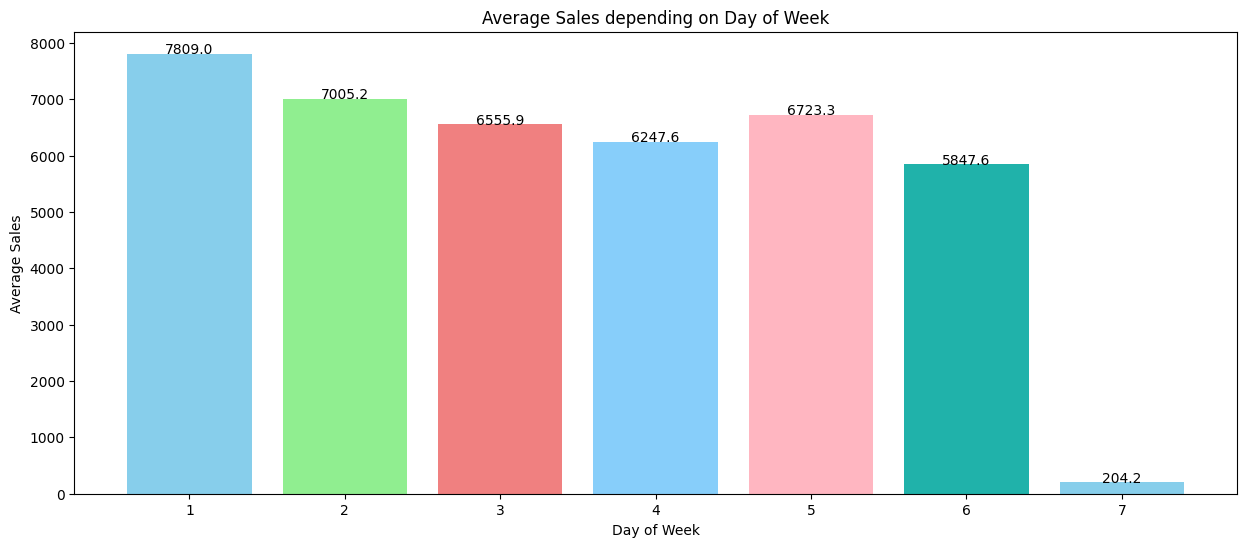

In [38]:
import matplotlib.pyplot as plt

# Define colors for the bars
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink', 'lightseagreen']

# Group by DayOfWeek and calculate mean sales
groupedData = train.groupby(['DayOfWeek'])
groupedStoresWeek = groupedData['Sales'].mean()

# Create the plot
plt.figure(figsize=(15, 6))
bars = plt.bar(groupedStoresWeek.index, groupedStoresWeek.values, color=colors[:len(groupedStoresWeek)])
plt.title("Average Sales depending on Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Average Sales")

# Add value annotations on the bars
for i, v in enumerate(groupedStoresWeek.values):
    plt.text(groupedStoresWeek.index[i], v + 3, str(round(v, 1)), color='black', fontweight='light', ha='center')

plt.show()

### Merged

In [18]:
df = pd.merge(left=store, right=train, on="Store")
df.head(3)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,-1.0,-1.0,-1,5,31/07/2015,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,-1.0,-1.0,-1,4,30/07/2015,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,-1.0,-1.0,-1,3,29/07/2015,4782,523,1,1,0,1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6852\1911168134.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Date"] = pd.to_datetime(df.Date)


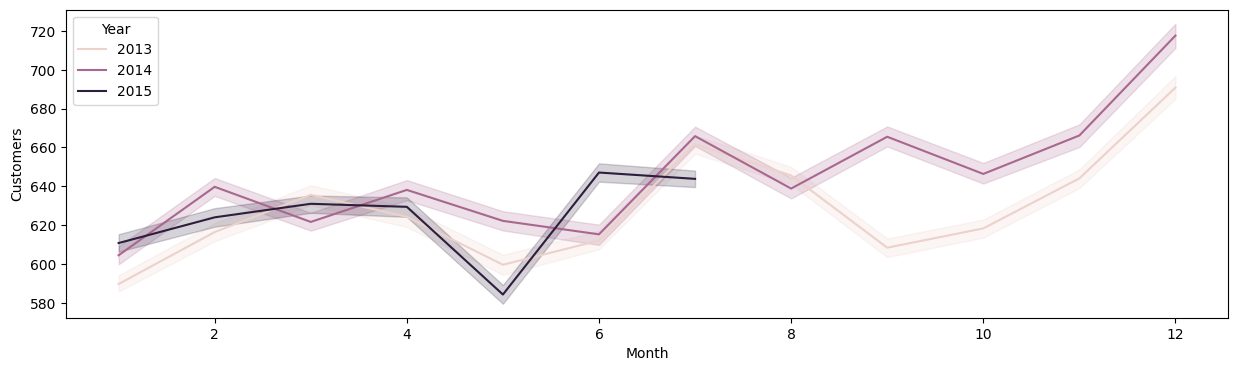

In [19]:
df["Date"] = pd.to_datetime(df.Date)

# Add 'Year' and 'Month columns to your DataFrame
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Plot the data
plt.figure(figsize=(15, 4))
sns.lineplot(x='Month', y='Customers', hue='Year', data=df)
plt.show()

In [20]:
n_df = df.groupby('Store')[['CompetitionDistance', 'Customers', 'Sales']].mean().reset_index().copy()

# Define bins and labels
bins = [0, 500, 2000, 5000, 10000, 20000, 30000, 40000, float('inf')]  # Ranges for CompetitionDistance
labels = ['0-500', '501-2000', '2001-5000', '5001-10000', '10001-20000', '20001-30000', '30001-40000', '40001+']

# Create a new column for the ranges
n_df['CompetitionDistanceRange'] = pd.cut(n_df['CompetitionDistance'], bins=bins, labels=labels, include_lowest=True)

# Display the updated DataFrame
print(n_df[['CompetitionDistance', 'CompetitionDistanceRange']].head())

   CompetitionDistance CompetitionDistanceRange
0               1270.0                 501-2000
1                570.0                 501-2000
2              14130.0              10001-20000
3                620.0                 501-2000
4              29910.0              20001-30000


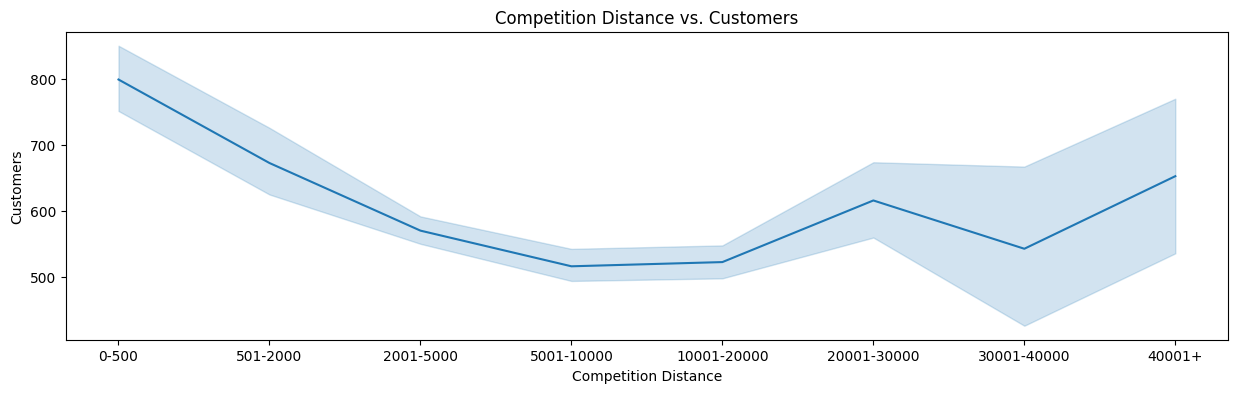

In [21]:
plt.figure(figsize=(15, 4))
sns.lineplot(x='CompetitionDistanceRange', y='Customers', data=n_df)
plt.title("Competition Distance vs. Customers")
plt.xlabel("Competition Distance")
plt.ylabel("Customers")
plt.show()

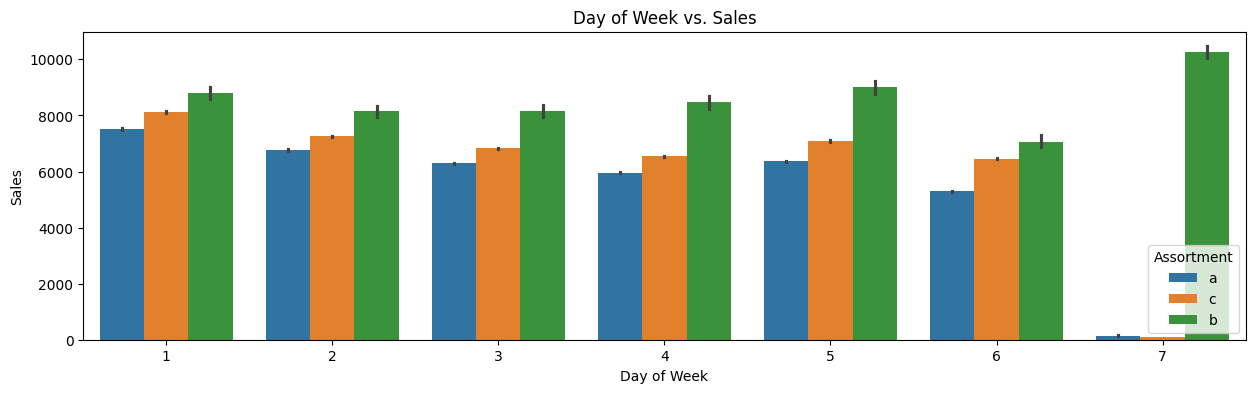

In [22]:
plt.figure(figsize=(15, 4))
sns.barplot(x='DayOfWeek', y='Sales', data=df, hue="Assortment")
plt.title("Day of Week vs. Sales")
plt.xlabel("Day of Week")
plt.ylabel("Sales")
plt.show()

In [23]:
n_df = df.groupby('Store')[['CompetitionDistance', 'Open']].sum().reset_index().copy()

# Define bins and labels
bins = [0, 500, 2000, 5000, 10000, 20000, float('inf')]  # Ranges for CompetitionDistance
labels = ['0-500', '501-2000', '2001-5000', '5001-10000', '10001-20000', '20001+']

# Create a new column for the ranges
n_df['CompetitionDistanceRange'] = pd.cut(n_df['CompetitionDistance'], bins=bins, labels=labels, include_lowest=True)

# Display the updated DataFrame
print(n_df[['CompetitionDistance', 'CompetitionDistanceRange']].head())

   CompetitionDistance CompetitionDistanceRange
0            1196340.0                   20001+
1             536940.0                   20001+
2           13310460.0                   20001+
3             584040.0                   20001+
4           28175220.0                   20001+


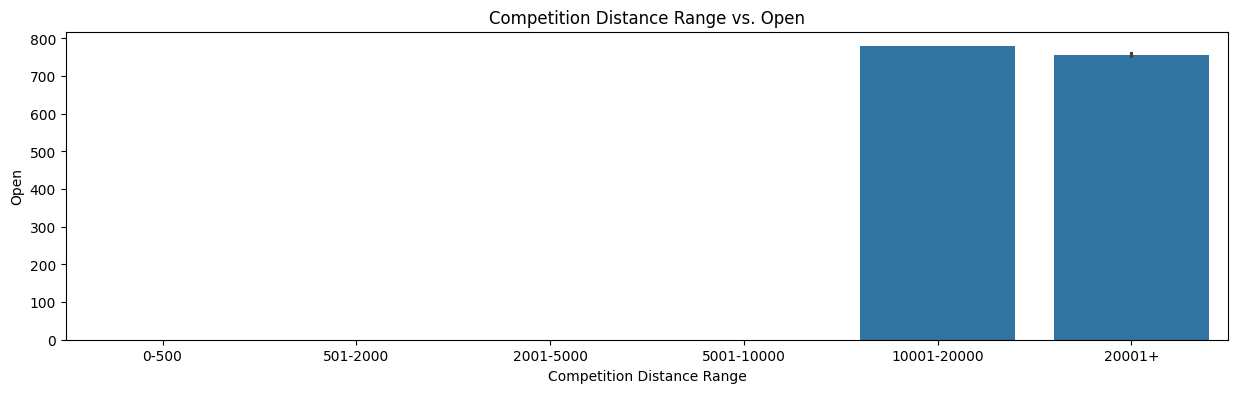

In [24]:
plt.figure(figsize=(15, 4))
sns.barplot(x='CompetitionDistanceRange', y='Open', data=n_df)
plt.title("Competition Distance Range vs. Open")
plt.xlabel("Competition Distance Range")
plt.ylabel("Open")
plt.show()

# Data Transformation

In [25]:
df = pd.merge(left=store, right=train, on="Store")
df.head(3)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,-1.0,-1.0,-1,5,31/07/2015,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,-1.0,-1.0,-1,4,30/07/2015,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,-1.0,-1.0,-1,3,29/07/2015,4782,523,1,1,0,1


### Data Cleaning

- Checking duplicates

In [26]:
df[df.duplicated()] # No duplicates are present

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday


- Checking Missing Values

In [27]:
null_counts = df.isnull().sum()
print(null_counts)

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
dtype: int64


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   StoreType                  1017209 non-null  object 
 2   Assortment                 1017209 non-null  object 
 3   CompetitionDistance        1017209 non-null  float64
 4   CompetitionOpenSinceMonth  1017209 non-null  float64
 5   CompetitionOpenSinceYear   1017209 non-null  float64
 6   Promo2                     1017209 non-null  int64  
 7   Promo2SinceWeek            1017209 non-null  float64
 8   Promo2SinceYear            1017209 non-null  float64
 9   PromoInterval              1017209 non-null  object 
 10  DayOfWeek                  1017209 non-null  int64  
 11  Date                       1017209 non-null  object 
 12  Sales                      1017209 non-null  int64  
 13  Customers   

In [29]:
df["Date"] = pd.to_datetime(df.Date)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6852\1767383741.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Date"] = pd.to_datetime(df.Date)


In [31]:
# objects = list()
# for col in df.columns:
#     if df[col].dtype == "object":
#         objects.append(col)
# objects

### Data Encoding

In [32]:
df = pd.get_dummies(df, drop_first=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 26 columns):
 #   Column                          Non-Null Count    Dtype         
---  ------                          --------------    -----         
 0   Store                           1017209 non-null  int64         
 1   CompetitionDistance             1017209 non-null  float64       
 2   CompetitionOpenSinceMonth       1017209 non-null  float64       
 3   CompetitionOpenSinceYear        1017209 non-null  float64       
 4   Promo2                          1017209 non-null  int64         
 5   Promo2SinceWeek                 1017209 non-null  float64       
 6   Promo2SinceYear                 1017209 non-null  float64       
 7   DayOfWeek                       1017209 non-null  int64         
 8   Date                            1017209 non-null  datetime64[ns]
 9   Sales                           1017209 non-null  int64         
 10  Customers                       1017209 no

### Normalization & Standardization

In [34]:
for col_name in ["Sales", "Customers", "CompetitionDistance"]:
    col = df[col_name]
    df[col_name] = (col-col.min())/(col.max()-col.min())
    
df[["Sales", "Customers", "CompetitionDistance"]].head()

,Sales,Customers,CompetitionDistance
0,0.126664,0.075122,0.016482
1,0.120815,0.073904,0.016482
2,0.115087,0.070790,0.016482
3,0.120599,0.075799,0.016482
4,0.146856,0.082837,0.016482


### Feature Engineering

- Checking Multicolinearity

In [36]:
corr = df.corr()
corr

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,DayOfWeek,Date,Sales,...,StoreType_d,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
Store,1.000000,-0.026394,-0.031125,-0.008794,0.008488,0.011054,0.008520,-8.483588e-06,0.000842,0.005126,...,-0.051492,0.019328,0.002661,8.035330e-03,0.012181,-0.013087,-0.000624,0.000665,-1.086178e-04,1.443168e-04
CompetitionDistance,-0.026394,1.000000,-0.031925,-0.002881,-0.139700,-0.125074,-0.139763,-2.458335e-05,0.002047,-0.019207,...,0.131610,-0.049883,0.150362,-5.064930e-02,-0.082626,-0.054949,-0.001944,-0.000972,-2.652508e-04,3.517620e-04
CompetitionOpenSinceMonth,-0.031125,-0.031925,1.000000,0.821814,-0.084218,-0.112154,-0.084142,8.346575e-06,-0.000597,-0.011163,...,-0.045908,-0.053909,-0.095499,-2.334595e-02,-0.052907,-0.036200,0.001259,-0.001588,7.776926e-05,-1.029369e-04
CompetitionOpenSinceYear,-0.008794,-0.002881,0.821814,1.000000,-0.097433,-0.124446,-0.097363,6.677575e-06,-0.000513,0.002749,...,-0.078003,-0.066661,-0.115449,-6.843753e-02,-0.010996,-0.073972,0.001544,-0.002573,6.667732e-05,-8.833803e-05
Promo2,0.008488,-0.139700,-0.084218,-0.097433,1.000000,0.772560,0.999999,1.682793e-04,-0.014508,-0.091040,...,0.093197,-0.012411,0.009310,3.628766e-01,0.635534,0.325154,0.011707,0.011041,1.878542e-03,-2.492231e-03
Promo2SinceWeek,0.011054,-0.125074,-0.112154,-0.124446,0.772560,1.000000,0.772379,2.080114e-04,-0.017894,-0.045965,...,0.076096,-0.017789,-0.027477,2.988789e-01,0.483720,0.242177,0.015409,0.010969,2.317052e-03,-3.073919e-03
Promo2SinceYear,0.008520,-0.139763,-0.084142,-0.097363,0.999999,0.772379,1.000000,1.683194e-04,-0.014512,-0.091056,...,0.093158,-0.012373,0.009354,3.628032e-01,0.635484,0.325310,0.011710,0.011042,1.878988e-03,-2.492823e-03
DayOfWeek,-0.000008,-0.000025,0.000008,0.000007,0.000168,0.000208,0.000168,1.000000e+00,0.000183,-0.462125,...,0.000071,-0.000007,-0.000051,-3.017220e-07,0.000198,-0.000019,0.029062,-0.040981,-4.066836e-02,-1.345413e-03
Date,0.000842,0.002047,-0.000597,-0.000513,-0.014508,-0.017894,-0.014512,1.827864e-04,1.000000,0.041904,...,-0.006113,0.000572,0.004287,-5.369209e-06,-0.017044,0.001587,-0.052340,-0.001144,-9.574772e-04,1.388713e-02
Sales,0.005126,-0.019207,-0.011163,0.002749,-0.091040,-0.045965,-0.091056,-4.621250e-01,0.041904,1.000000,...,-0.022854,0.065473,0.068772,-4.366787e-02,-0.034946,-0.053267,0.123160,-0.203028,-1.174965e-01,-9.261768e-02


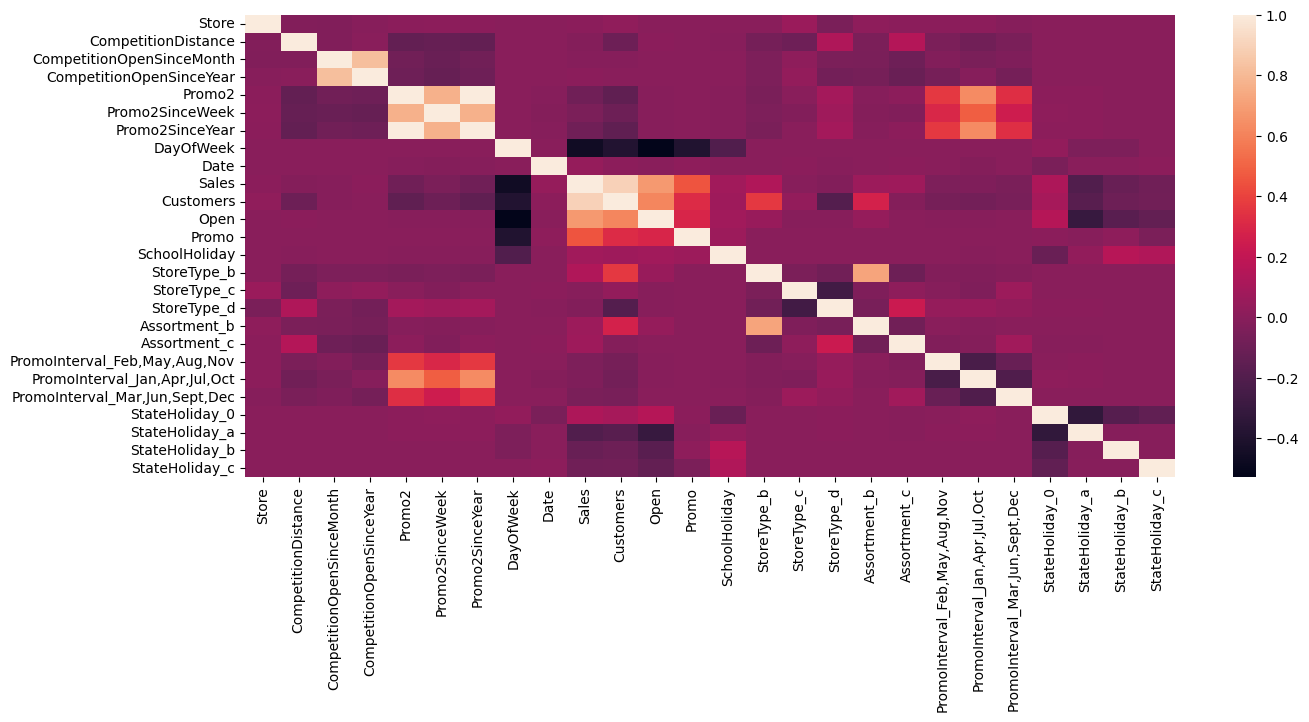

In [39]:
plt.figure(figsize=(15, 6))
sns.heatmap(corr)
plt.show()

`Promo2` has high correlation with `Promo2SinceWeek`, `Promo2SinceYear` and encoded features of `Promo2Interval`, as all these features depend on whether the shop participated in the Promo2 or not.

Removing `Promo2` should prevent us from multicollinearity problem that may occur while creating the model.

- Feature Selection

In [ ]:
df.drop(["Promo2"], axis=1, inplace=True)

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2SinceWeek,Promo2SinceYear,DayOfWeek,Date,Sales,Customers,...,StoreType_d,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,0.016482,9.0,2008.0,-1.0,-1.0,5,2015-07-31,0.126664,0.075122,...,False,False,False,False,False,False,True,False,False,False
1,1,0.016482,9.0,2008.0,-1.0,-1.0,4,2015-07-30,0.120815,0.073904,...,False,False,False,False,False,False,True,False,False,False
2,1,0.016482,9.0,2008.0,-1.0,-1.0,3,2015-07-29,0.115087,0.070790,...,False,False,False,False,False,False,True,False,False,False
3,1,0.016482,9.0,2008.0,-1.0,-1.0,2,2015-07-28,0.120599,0.075799,...,False,False,False,False,False,False,True,False,False,False
4,1,0.016482,9.0,2008.0,-1.0,-1.0,1,2015-07-27,0.146856,0.082837,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,0.070280,-1.0,-1.0,22.0,2012.0,6,2013-01-05,0.114823,0.045885,...,True,False,True,False,False,True,True,False,False,False
1017205,1115,0.070280,-1.0,-1.0,22.0,2012.0,5,2013-01-04,0.109263,0.044126,...,True,False,True,False,False,True,True,False,False,False
1017206,1115,0.070280,-1.0,-1.0,22.0,2012.0,4,2013-01-03,0.103415,0.040606,...,True,False,True,False,False,True,True,False,False,False
1017207,1115,0.070280,-1.0,-1.0,22.0,2012.0,3,2013-01-02,0.088975,0.041283,...,True,False,True,False,False,True,True,False,False,False


- Feature Extraction

There is also high correlation between `StoreType_b` and `Assortment_b` columns.

In [81]:
same = df[df.StoreType_b == df.Assortment_b].shape[0]
print(
    f"Percentage of records which have StoreType and Assortment as 'b' are {(same/df.shape[0])*100:.2f}%"
)

Percentage of records which have StoreType and Assortment as 'b' are 99.26%


In [77]:
store[(store.StoreType == 'b') | (store.Assortment == 'b')].Store.unique()

array([  85,  259,  262,  274,  335,  353,  423,  494,  512,  562,  676,
        682,  733,  769,  948, 1081, 1097])

In [75]:
df[(df.StoreType_b == True) | (df.Assortment_b == True)].Store.unique()

array([  85,  259,  262,  274,  335,  353,  423,  494,  512,  562,  676,
        682,  733,  769,  948, 1081, 1097])

This basically means 99.26% of the records in the train data are from the following stores:
[  85,  259,  262,  274,  335,  353,  423,  494,  512,  562,  676,
        682,  733,  769,  948, 1081, 1097]

Instead of choosing which column to remove among `StoreType_b` and `Assortment_b`, it's better to add a new feature that essentially captures the information regarding whether these column are same or not. And, then remove both `StoreType_b` and `Assortment_b` columns from the dataframe later on.

In [84]:
df["StoreType_and_Assortment_b"] = (df.StoreType_b == df.Assortment_b)

In [85]:
df.drop(["StoreType_b", "Assortment_b"], axis=1, inplace=True)

# Model Training
[Note: Not part of our group work, so it should be done individually]

# Model Testing
[Note: Not part of our group work, so it should be done individually]

# Rough